In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from toolkit.transformation import rotate_image, paste_image
from toolkit.measurement import get_rotation
from math import sin, radians

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("..\landmarks\shape_predictor_68_face_landmarks.dat")

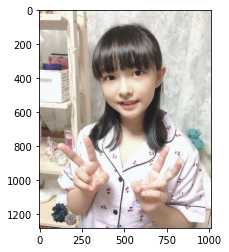

In [2]:
image = cv2.imread("../sample.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

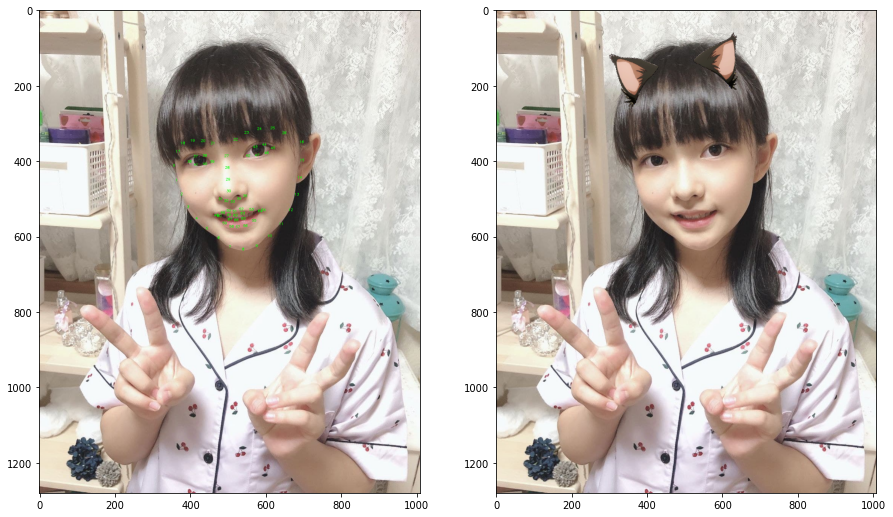

In [3]:
landmarked_image = image.copy()
masked_image = image.copy()
ears_orig = cv2.imread(r"..\dataset\neko_ears\6570766_preview.png")
faces = detector(landmarked_image)
for face_index, face in enumerate(faces):
    landmark = predictor(landmarked_image, face)
    for i in range(landmark.num_parts):
        x = landmark.part(i).x
        y = landmark.part(i).y
        
        cv2.putText(landmarked_image, str(i), (x, y),
                    cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.3, (0, 255, 0))
    
    ears = ears_orig.copy()
    p1 = (landmark.part(0).x, landmark.part(0).y)
    p2 = (landmark.part(16).x, landmark.part(16).y)
    distance = ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2) ** 0.5
    distance = int(distance)
    ratio = distance / ears.shape[1]
    dim = (distance, int(ears.shape[0] * ratio))
    
    resized = cv2.resize(ears, dim, interpolation=cv2.INTER_NEAREST)
    
    rot = get_rotation(image)
    ears = rotate_image(resized, rot)
    
    start = p1[0]-int(resized.shape[1]*sin(radians(rot)))
    
    masked_image = paste_image(image, ears, [start, 60])
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax1.imshow(cv2.cvtColor(landmarked_image, cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(122)
ax2.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.show()